In [89]:
from IPython.display import display, HTML
display(HTML("<h1 style='color:red' align='center'>Supervised Learning</h1>"))

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Load the breast cancer dataset from scikit-learn using the load_digits function.

In [91]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

In [92]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [93]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

## Data PreProcessing

In [94]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [95]:
missing_values=X.isnull().sum()
print(missing_values)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


#### There are no missing values in the data

In [96]:
X.drop_duplicates(inplace=True)

#### Dropped all duplicate values

## Encoding by FeatureScaling

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [98]:
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


## Logistic Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2)

In [102]:
model.fit(X_train, y_train)

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
model.score(X_test, y_test)

0.9473684210526315

#### Confusion Matrix

In [104]:
y_predicted = model.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[43,  3],
       [ 3, 65]], dtype=int64)

#### 109 samples are correct and 5 are wrong

#### Accuracy of Logistic regression model is 94.7%

## Decision Tree Model

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [107]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
tree_model1=DecisionTreeClassifier()

In [110]:
tree_model1.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.6145833333333334, 0.9375, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.3958333333333333, 0.8125, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.5052083333333334, 0.875, 'True  '),
 Text(0.2916666666666667, 0.6875, 'x[13] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.20833333333333334, 0.5625, 'x[24] <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [3, 257]'),
 Text(0.16666666666666666, 0.4375, 'x[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [2, 257]'),
 Text(0.08333333333333333, 0.3125, 'x[14] <= 0.003\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.3125, 'x[21] <= 33.35\ngini = 0.008\nsamples = 252\nvalue = [1, 251]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [0, 237]'),
 Text(0.2916666666666667, 0.1875, 'x[21] <

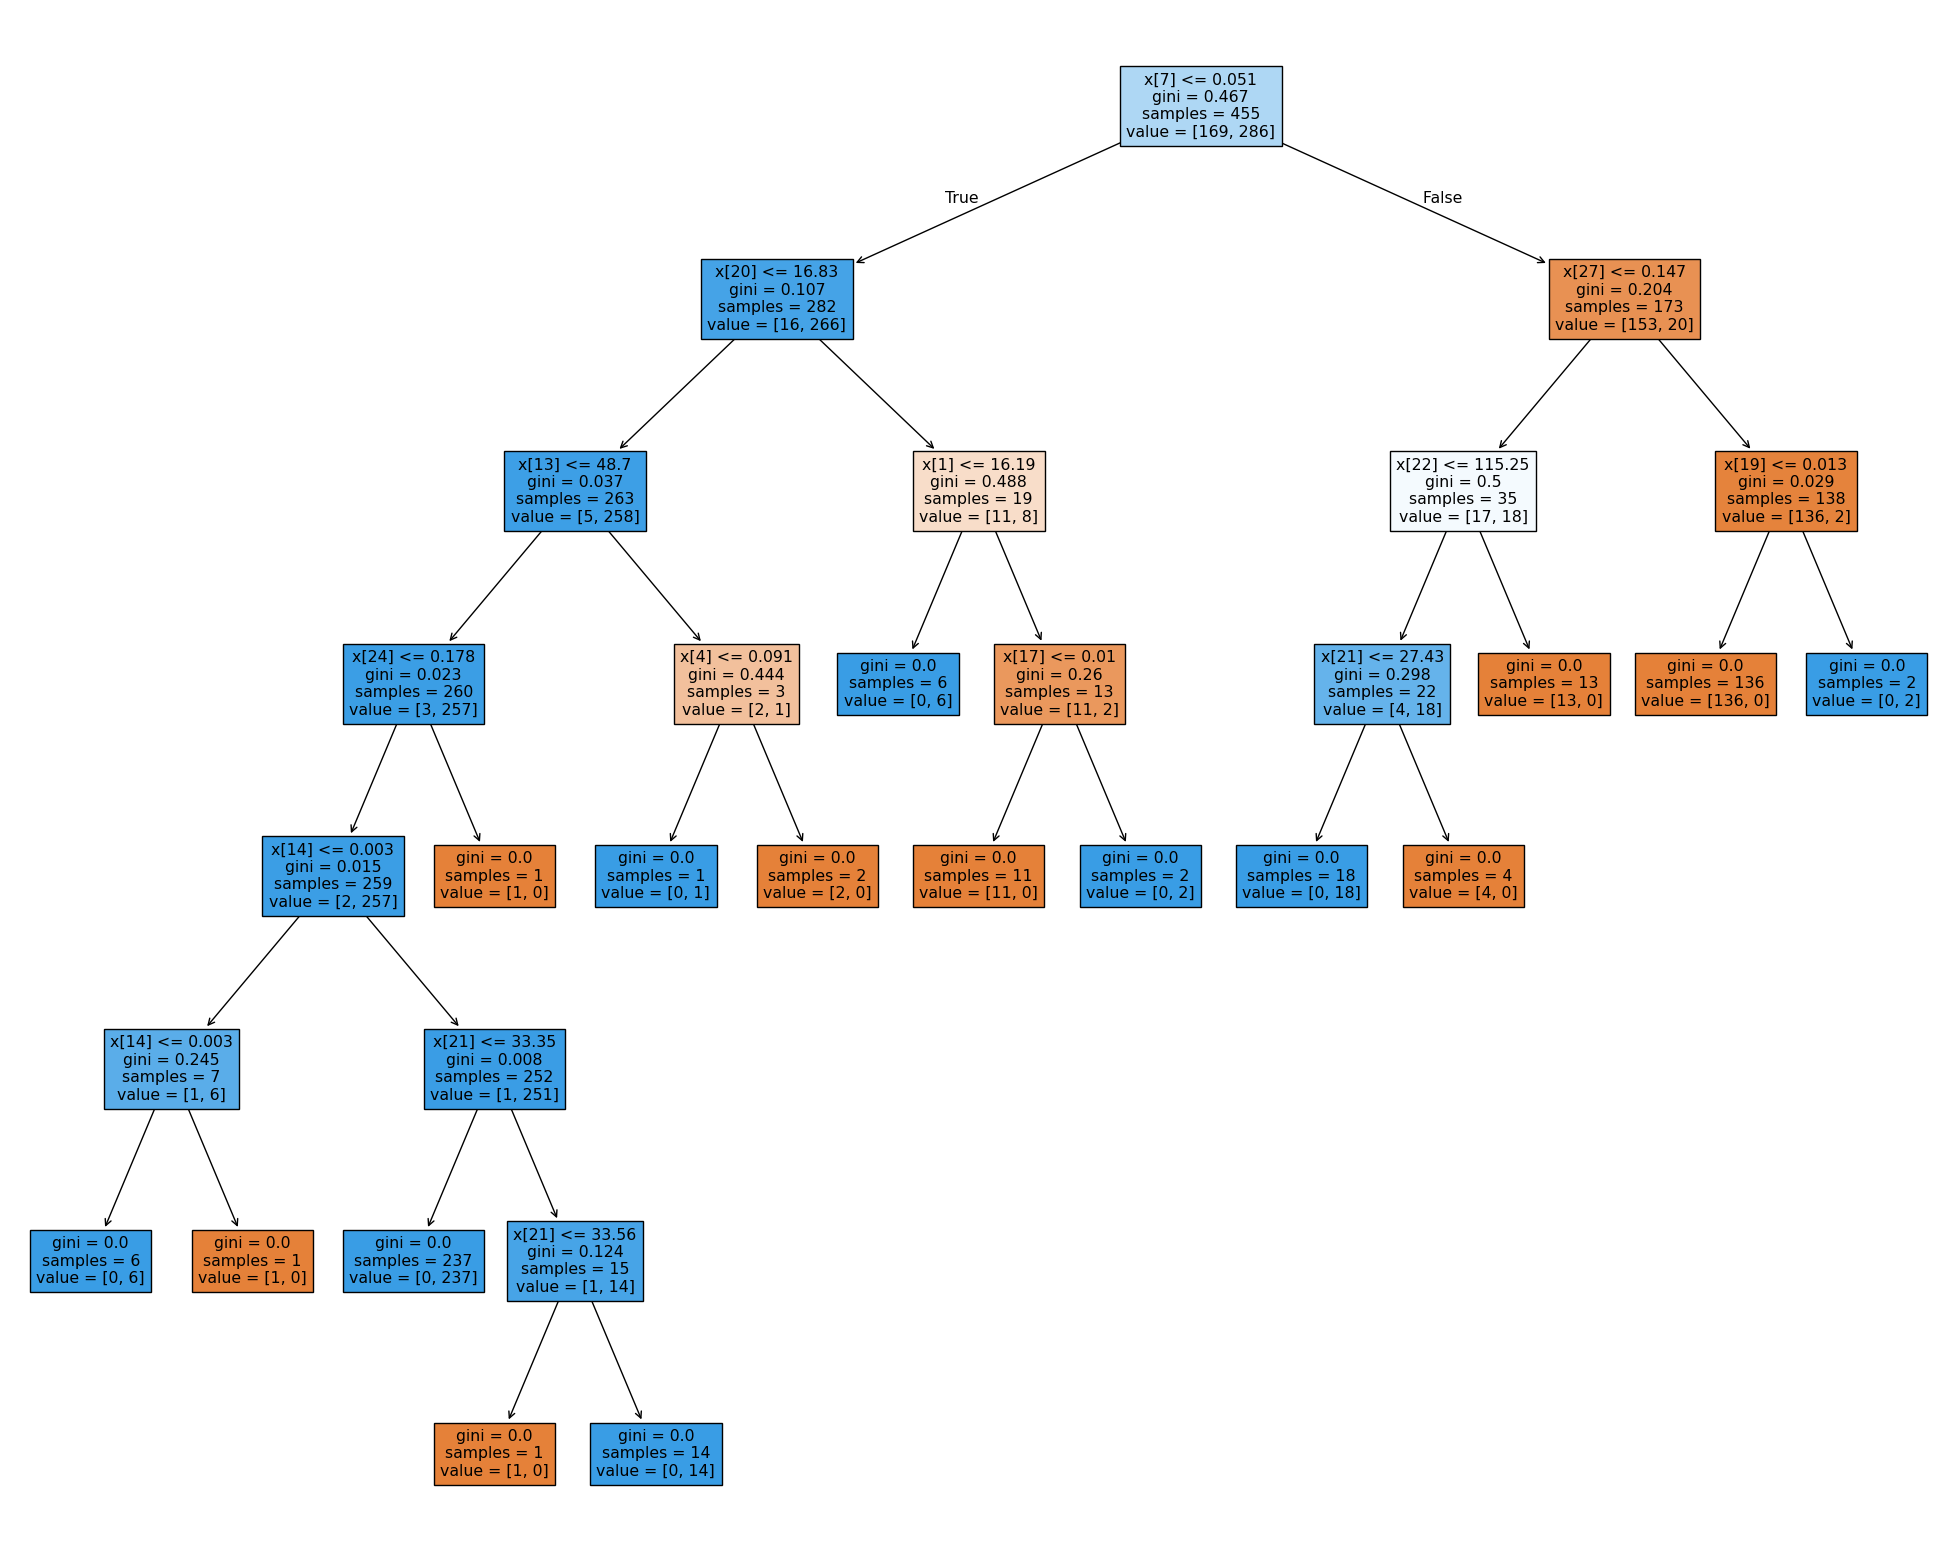

In [111]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(tree_model1, filled=True)

##### Prediction

In [112]:
y_pred1 = tree_model1.predict(X_test)

In [113]:
y_pred1

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [114]:
from sklearn.metrics import accuracy_score, classification_report

In [115]:
print(accuracy_score(y_pred1, y_test))

0.9298245614035088


In [116]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



#### Accuracy is 93%. Precision is 91%

### Post Pruning

In [117]:
# Post pruning with max_depth 2
tree_model2=DecisionTreeClassifier(max_depth = 2)

In [118]:
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.25, 0.5, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.75, 0.5, 'x[27] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [153, 20]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.029\nsamples = 138\nvalue = [136, 2]')]

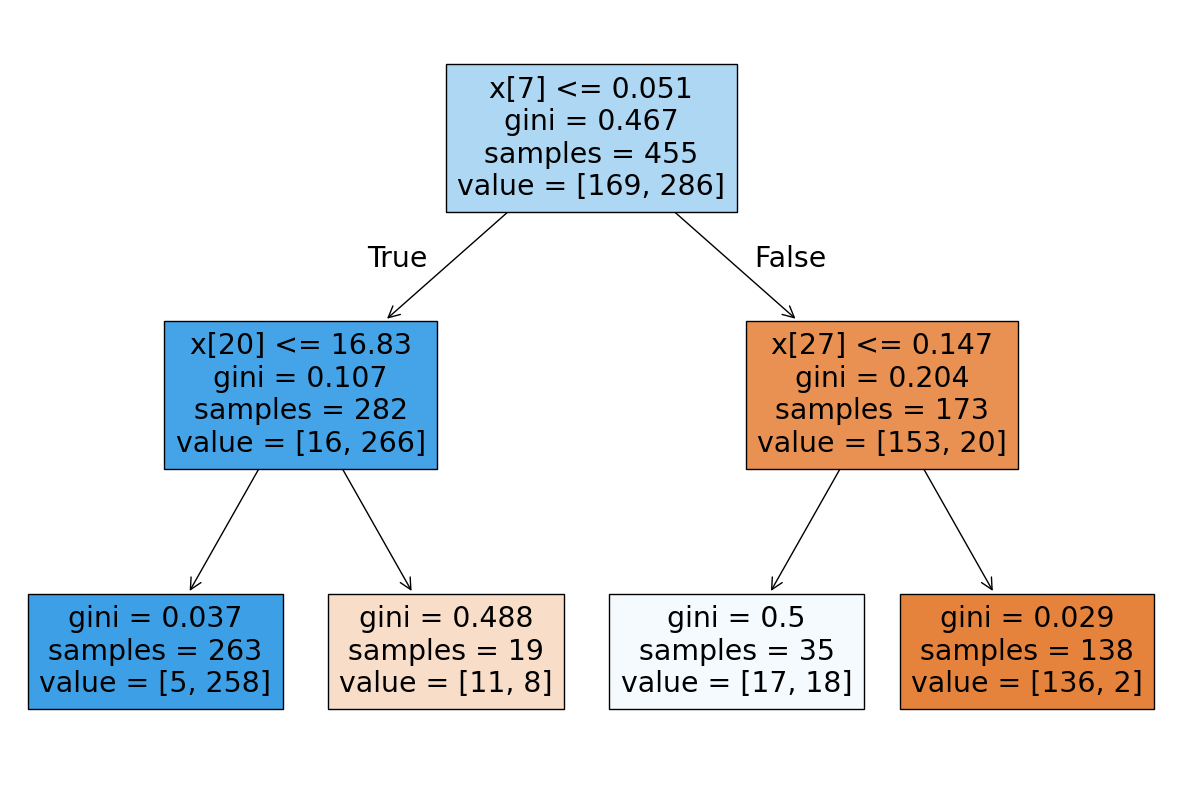

In [119]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model2, filled=True)

In [120]:
# Prediction
y_pred2 = tree_model2.predict(X_test)

In [121]:
y_pred2

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [122]:
print(accuracy_score(y_pred2, y_test))

0.9298245614035088


In [123]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        39
           1       0.97      0.92      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



#### Computing Cost Complexity Pruning path

In [124]:
model = DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(X_train, y_train)
print(path)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

clfs = []
accuracy = []

for ccp_alpha in ccp_alphas :
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    clf_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, clf_pred))

print(clfs)
print(accuracy)

{'ccp_alphas': array([0.        , 0.00218083, 0.0029304 , 0.00431133, 0.00559513,
       0.00743872, 0.0086638 , 0.01291987, 0.01438561, 0.02404453,
       0.02442056, 0.0306549 , 0.3228506 ]), 'impurities': array([0.        , 0.00872332, 0.01165373, 0.01596506, 0.02156019,
       0.0289989 , 0.0376627 , 0.05058258, 0.06496819, 0.08901272,
       0.11343328, 0.14408818, 0.46693878])}
[0.         0.00218083 0.0029304  0.00431133 0.00559513 0.00743872
 0.0086638  0.01291987 0.01438561 0.02404453 0.02442056 0.0306549
 0.3228506 ]
[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.00218083075225933, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0029304029304029304, random_state=0), DecisionTreeClassifier(ccp_alpha=0.004311334641004935, random_state=0), DecisionTreeClassifier(ccp_alpha=0.005595128280123898, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007438715131022823, random_state=0), DecisionTreeClassifier(ccp_alpha=0.008663799968147794, random_stat

#### Analysing the result
Alpha values are {'ccp_alphas': array([0.        , 0.00260026, 0.00260479, 0.00349956, 0.00419948,
       0.00459318, 0.00512828, 0.00513124, 0.00661861, 0.00816565,
       0.01003442, 0.01020706, 0.01502034, 0.01572771, 0.02657151,
       0.34096887]), 'impurities': array([0.        , 0.01040103, 0.0156106 , 0.01911016, 0.02330964,
       0.02790282, 0.0330311 , 0.03816233, 0.04478094, 0.05294659,
       0.06298101, 0.07318806, 0.08820841, 0.10393612, 0.13050763,
       0.47147
       
Accuracy scores are [0.9148936170212766, 0.9308510638297872, 0.9308510638297872, 0.9308510638297872, 0.9468085106382979, 0.9521276595744681, 0.9574468085106383, 0.9521276595744681, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9521276595744681, 0.925531914893617, 0.898936170212766, 0.8882978723404256, 0.6436170212765957]
       
As the alpha value increases (indicating more aggressive pruning), the accuracy tends to decrease.
       
Hence, p5 ])}Pruning with lowest alpha value leads to model with higher accuracy indicating a better balance between model compl
exity and acc

Therefore, the optimal alpha value would likely be one of the lower values, such as 0.00260026, 0.00260479,  0.00349956, 0.00419948, 0.00459318, 0.00512828 etc. where the accuracy is still high.uracy.

In [125]:
best_alpha_index = accuracy.index(max(accuracy))
best_alpha = ccp_alphas[best_alpha_index]
best_model = clfs[best_alpha_index]

print("Best Alpha:", best_alpha)
print("Best Model:", best_model)
print("Accuracy with Best Model:", accuracy[best_alpha_index])

Best Alpha: 0.005595128280123898
Best Model: DecisionTreeClassifier(ccp_alpha=0.005595128280123898, random_state=0)
Accuracy with Best Model: 0.956140350877193


[Text(0.43333333333333335, 0.9, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.13333333333333333, 0.7, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.2833333333333333, 0.8, 'True  '),
 Text(0.06666666666666667, 0.5, 'gini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.2, 0.5, 'x[21] <= 19.91\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.13333333333333333, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.26666666666666666, 0.3, 'x[17] <= 0.01\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7333333333333333, 0.7, 'x[27] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [153, 20]'),
 Text(0.5833333333333333, 0.8, '  False'),
 Text(0.6, 0.5, 'x[22] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.5333333333333333, 0.3, 'x[1] <= 21.055\ngini = 0.298\nsamples 

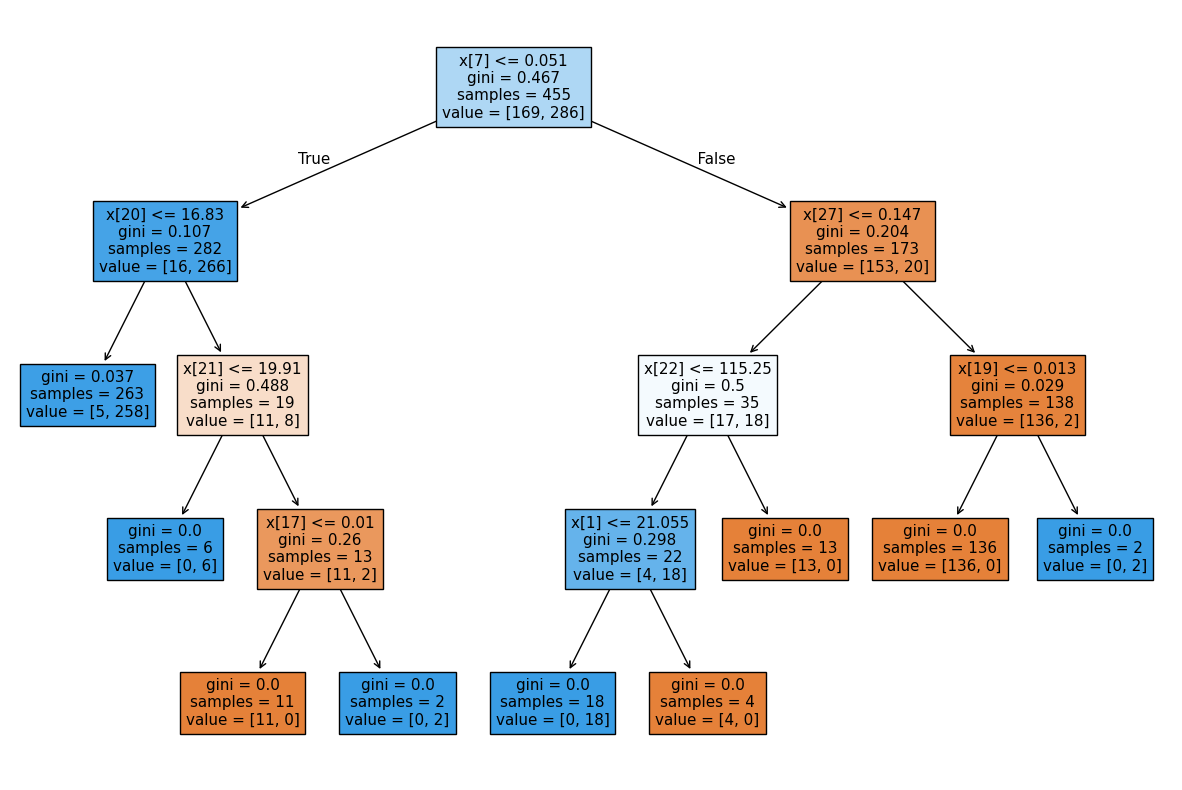

In [126]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_model,filled=True)

### Pre-pruning

#### Grid Search CV

In [127]:
treemodel3 = DecisionTreeClassifier()

In [128]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']    
}

In [129]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(treemodel3,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [130]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [131]:
y_pred3=cv.predict(X_test)

In [132]:
print(accuracy_score(y_pred3,y_test))

0.9473684210526315


In [133]:
best_model1=DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='log2', splitter='best')
best_model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2')

[Text(0.43333333333333335, 0.9, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.13333333333333333, 0.7, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.2833333333333333, 0.8, 'True  '),
 Text(0.06666666666666667, 0.5, 'gini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.2, 0.5, 'x[21] <= 19.91\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.13333333333333333, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.26666666666666666, 0.3, 'x[17] <= 0.01\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7333333333333333, 0.7, 'x[27] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [153, 20]'),
 Text(0.5833333333333333, 0.8, '  False'),
 Text(0.6, 0.5, 'x[22] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.5333333333333333, 0.3, 'x[1] <= 21.055\ngini = 0.298\nsamples 

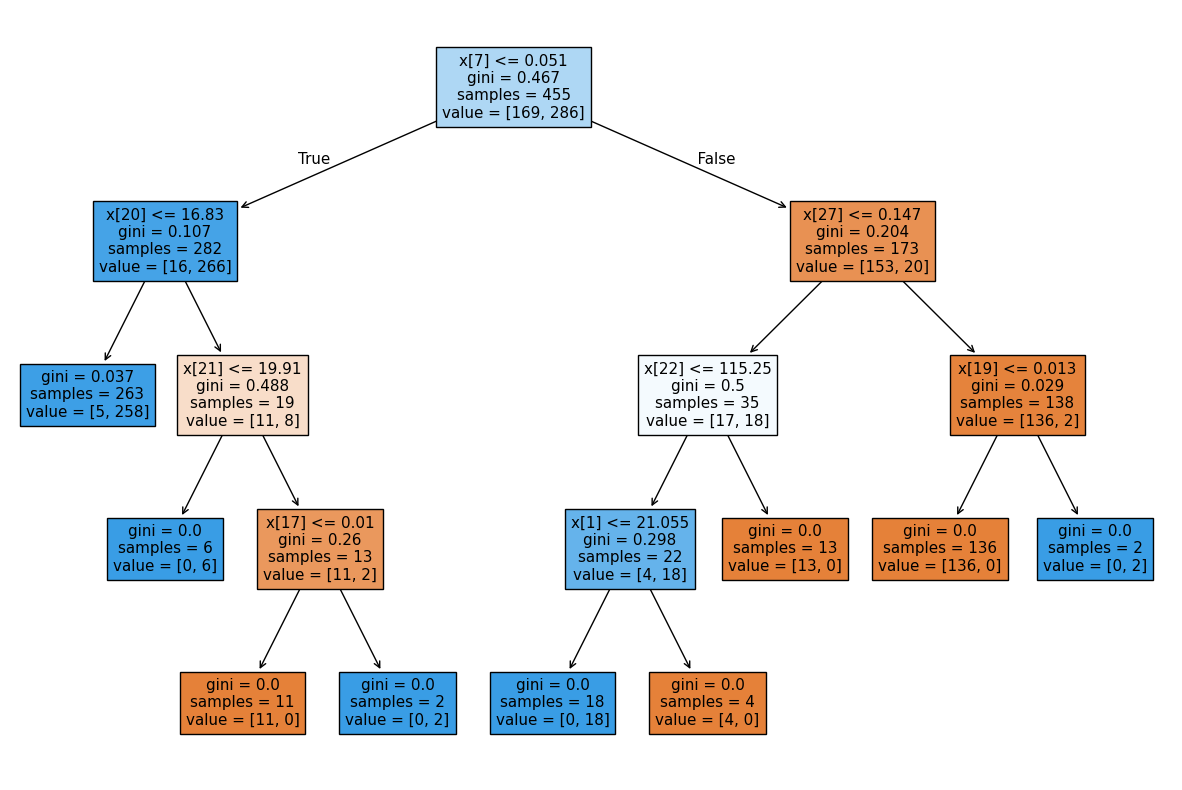

In [134]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_model,filled=True)

#### By computing cost complexity pruning path, accuracy is 95.7%. This is the best model.
By applying pre-pruning technique, accuracy obtained is 94.7%.

## Random Forest Model

In [135]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [136]:
rclf=RandomForestClassifier()
rclf.fit(X_train,y_train)
rclf_pred=rclf.predict(X_test)
print(accuracy_score(y_test,rclf_pred))

0.9649122807017544


### Bagging Classifier

In [137]:
bclf=BaggingClassifier(n_estimators=100)
bclf.fit(X_train,y_train)
bclf_pred=bclf.predict(X_test)
print(accuracy_score(y_test,bclf_pred))

0.956140350877193


### AdaBoost Classifier

In [138]:
aclf=AdaBoostClassifier(n_estimators=100)
aclf.fit(X_train,y_train)
aclf_pred=aclf.predict(X_test)
print(accuracy_score(y_test,aclf_pred))

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9736842105263158


### Gadient Boosting Classifier

In [139]:
gclf=GradientBoostingClassifier(n_estimators=100)
gclf.fit(X_train,y_train)
gclf_pred=gclf.predict(X_test)
print(accuracy_score(y_test,gclf_pred))

0.956140350877193


### XG Boost

In [140]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
import xgboost as xgb
xclf = xgb.XGBClassifier()
xclf.fit(X_train, y_train)
xclf_pred = xclf.predict(X_test)
print(accuracy_score(y_test, xclf_pred))

0.956140350877193


### Evaluation

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [143]:
print("Precision")
print("Random forest : ",precision_score(y_test,rclf_pred))
print("Bagging Classifier : ",precision_score(y_test,bclf_pred))
print("Adaboost : ",precision_score(y_test,aclf_pred))
print("GradientBoost : ",precision_score(y_test,gclf_pred))
print("XGBoost : ",precision_score(y_test,xclf_pred))

Precision
Random forst :  0.958904109589041
Bagging Classifier :  0.9583333333333334
Adaboost :  0.9722222222222222
GradientBoost :  0.9583333333333334
XGBoost :  0.9583333333333334


In [144]:
print("Recall")
print("Random forest : ",recall_score(y_test,rclf_pred))
print("Bagging Classifier : ",recall_score(y_test,bclf_pred))
print("Adaboost : ",recall_score(y_test,aclf_pred))
print("GradientBoost : ",recall_score(y_test,gclf_pred))
print("XGBoost : ",recall_score(y_test,xclf_pred))

Recall
Random forst :  0.9859154929577465
Bagging Classifier :  0.971830985915493
Adaboost :  0.9859154929577465
GradientBoost :  0.971830985915493
XGBoost :  0.971830985915493


In [145]:
print("F1 score")
print("Random forest : ",f1_score(y_test,rclf_pred))
print("Bagging Classifier : ",f1_score(y_test,bclf_pred))
print("Adaboost : ",f1_score(y_test,aclf_pred))
print("GradientBoost : ",f1_score(y_test,gclf_pred))
print("XGBoost : ",f1_score(y_test,xclf_pred))

F1 score
Random forst :  0.9722222222222222
Bagging Classifier :  0.965034965034965
Adaboost :  0.9790209790209791
GradientBoost :  0.965034965034965
XGBoost :  0.965034965034965


In [164]:
print("confusion matrix")
print("Random forest : ")
print(confusion_matrix(y_test,rclf_pred))
print("Bagging Classifier : ")
print(confusion_matrix(y_test,bclf_pred))
print("Adaboost : ")
print(confusion_matrix(y_test,aclf_pred))
print("GradientBoost : ")
print(confusion_matrix(y_test,gclf_pred))
print("XGBoost : ")
print(confusion_matrix(y_test,xclf_pred))

confusion matrix
Random forst : 
[[40  3]
 [ 1 70]]
Bagging Classifier : 
[[40  3]
 [ 2 69]]
Adaboost : 
[[41  2]
 [ 1 70]]
GradientBoost : 
[[40  3]
 [ 2 69]]
XGBoost : 
[[40  3]
 [ 2 69]]


In [147]:
print("classification_report")
print("Random forest : ")
print(classification_report(y_test,rclf_pred))
print("Bagging Classifier : ")
print(classification_report(y_test,bclf_pred))
print("Adaboost : ")
print(classification_report(y_test,aclf_pred))
print("GradientBoost : ")
print(classification_report(y_test,gclf_pred))
print("XGBoost : ")
print(classification_report(y_test,xclf_pred))

classification_report
Random forst : 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Bagging Classifier : 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Adaboost : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
we

#### Comparing Random forest model, adaBoost, Gradient Boost, XG boost and Bagging classifier :
Highest Accuracy : XG Boost (97%), Random Forest (96%), Gradient Boost (96%)

Highest Precision : XG Boost (97%), Random Forest (97%)

Highest recall : Ada Boost, XG Boost

Highest fi score : XG Boost

#### Comparing the above models, XG boost shows best result with 97% accuracy and 97% precision.

## SVM

In [148]:
from sklearn.svm import SVC

svc_model=SVC(kernel='rbf',C=3)
svc_model.fit(X_train, y_train)

SVC(C=3)

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

svc_pred = svc_model.predict(X_test)
print("Accuracy score :",accuracy_score(y_test, svc_pred))
print("Precision : ",precision_score(y_test,svc_pred))
print("Recall : ",recall_score(y_test,svc_pred))
print("F1 score : ",f1_score(y_test,svc_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test,svc_pred))

Accuracy score : 0.9473684210526315
Precision :  0.922077922077922
Recall :  1.0
F1 score :  0.9594594594594594
Confusion matrix :
[[37  6]
 [ 0 71]]


In [150]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='f1_macro')

# Calculate mean F1 score 
mean_f1 = np.mean(scores)

print("5 fold cross validation")
print(f'Mean F1 Score: {mean_f1:.2f}')

5 fold cross validation
Mean F1 Score: 0.91


### Parameter Tuning

In [151]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 3, 10],          # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='f1_macro', cv=5)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best F1 score achieved during cross-validation
best_f1_score = grid_search.best_score_
print("Best F1 Score:", best_f1_score)

# Get the best trained model
best_model = grid_search.best_estimator_
print(best_model)

Best Hyperparameters: {'C': 3, 'gamma': 'scale'}
Best F1 Score: 0.9090251406194267
SVC(C=3)


## KNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [153]:
from sklearn.metrics import accuracy_score, classification_report

knn_pred=knn.predict(X_test)

print("Accuracy score :",accuracy_score(y_test, knn_pred))
print("classification_report")
print(classification_report(y_test,knn_pred))

Accuracy score : 0.956140350877193
classification_report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### Parameter Tuning

In [154]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test different values of n_neighbors
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Number of Neighbors:", best_params['n_neighbors'])

# Get the best trained model
best_model = grid_search.best_estimator_
print(best_model)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy:.2f}')

Best Number of Neighbors: 9
KNeighborsClassifier(n_neighbors=9)
Accuracy with Best Model: 0.96


#### Accuracy of SVV and KNN model is 95%

## Naive Bayes

In [155]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [156]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [157]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [158]:
# Initialize Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [159]:
classifier.fit(X_train, y_train)

GaussianNB()

In [160]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [161]:
accuracy = accuracy_score( y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


In [162]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[40  3]
 [ 0 71]]


##### Out of 114 samples, 3 are wrong and 111 are correct predictions.

In [163]:
print("Classification Report :")
print(classification_report(y_pred,y_test))

Classification Report :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.96      0.98        74

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



#### Accuracy of Naive Bayes model is 97%

#### Comparing Performance of the models
Accuracies :
Logistic Regression Model : 94.7 % , Decision Tree Model : 95.7%

Comparing Random forest model, adaBoost, Gradient Boost, XG boost and Bagging classifier :

Highest Accuracy : XG Boost (97%), Random Forest (96%), Gradient Boost (96%)

Highest Precision : XG Boost (97%), Random Forest (97%)

Highest recall : Ada Boost, XG Boost

Highest f1 score : XG Boost

SVM : 95%

KNN : 95%

Naive Bayes : 97%

Comparing all the models, XG Boost and Naive Bayes performs best and Logistic Regression Model performs worse.